## Trabalho de casa nº7

**Identificador**: Trabalho nº7

**Título**: Leitura e processamento de Datasets

**Data início**: 2021-11-24 **Data fim**: 2021-11-28

**Supervisor**: José Carlos Ramalho, https://www.di.uminho.pt/~jcr/thesup-v2.php

**Autor**: Raquel Vitorino Lima, A97590

### Resumo:

Com o trabalho proposto, desenvolvemos um código que permite a leitura e o processamento de Datasets. Este permite também a criação de uma tabela que nos possibilita a observavação do id, do nome, do curso e a da média dos alunos em questão. Podemos ainda procurar um aluno pelo seu ID e obter as suas informações, juntamente com a média dos seus trabalhos realizados. Desenvolvemos uma função que nos permite obter uma lista com as informações dos alunos com as 10 médias mais altas e desenvolvemos duas funções que concedem a obtenção de uma lista de pares indicando quantos alunos há em cada curso e uma lista de pares com a média e o número de alunos com essa média. 
Por fim, em termos gráficos, desenvolvemos duas funções que nos permitem observar a distribuição dos alunos por curso e a distribuição dos alunos por médias, respetivamente. 

### Código:


[['a1', 'Aysha Melanie Gilberto', 'LEI', [12, 8, 19, 8]], ['a2', 'Igor André Cantanhede', 'ENGFIS', [12, 16, 18, 20]], ['a3', 'Laurénio Narciso', 'ENGFIS', [8, 14, 15, 14]], ['a4', 'Jasnoor Casegas', 'LCC', [14, 20, 17, 11]], ['a5', 'Tawseef Rebouças', 'ENGBIOM', [13, 14, 13, 17]], ['a6', 'Eryk Clementino', 'LEI', [10, 19, 11, 14]], ['a7', 'Ianna Noivo', 'ENGBIOM', [15, 15, 17, 16]], ['a8', 'Ayla Thaissa Reina', 'ENGBIOM', [12, 8, 8, 18]], ['a9', 'Cássia Viviane Coitã', 'ENGFIS', [19, 9, 14, 10]], ['a10', 'Koby Vindima', 'LEI', [9, 14, 20, 13]], ['a11', 'Gustavo Martim Hernandez', 'ENGBIOM', [11, 8, 14, 11]], ['a12', 'Siddarta Beiriz', 'LEI', [17, 10, 16, 16]], ['a13', 'Daniela Patrícia Montes', 'ENGBIOM', [15, 15, 18, 19]], ['a14', 'Kaylla Pessego', 'LCC', [10, 14, 17, 15]], ['a15', 'Bianca Cristina Primitivo', 'ENGBIOM', [16, 9, 18, 10]], ['a16', 'Magna Galhardo', 'ENGFIS', [20, 18, 9, 14]], ['a17', 'Grace Isabel Patriarca', 'LCC', [19, 13, 9, 10]], ['a18', 'Saubhagya Buco', 'LEI', [

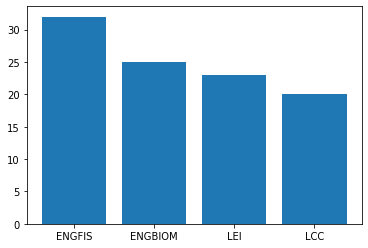

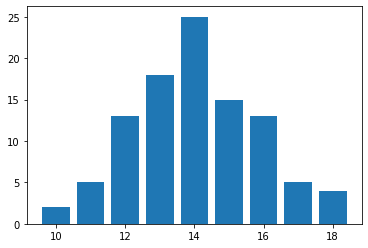

In [2]:

import matplotlib.pyplot as plt


# exercicio 1
#Depois de pensares num modelo adequado especifica a função que lê o ficheiro e povoa esse modelo.

def getAluno(texto):
    textoLimpo=texto.replace("\"","")
    campos=textoLimpo.split(",")
    aluno=[]
    aluno.append(campos[0])
    aluno.append(campos[1])
    aluno.append(campos[2])
    aluno.append(campos[3:])
    lista=[]
    for s in aluno[3]:
        lista.append(int(s))
    aluno[3]=lista
    return aluno

# Leitura/carregamento da informação do ficheiro
def lerDataset(fnome):
    f=open(fnome, encoding="utf-8")
    bd=[]
    f.readline()
    for linha in f:
        bd.append(getAluno(linha))
    return bd

BD=[]
BD=lerDataset("alunos.csv")
print(BD)

# exercicio 2
def chaveOrd(a):
    return a[1]

# Listagem da informação
def listarDataset(bd):
    bd.sort(key=chaveOrd)
    print("id           nome            curso     média")
    print("--------------------------------------------")
    for a in bd:
        print(a[0] + " | " + a[1] + " | " + a[2] + " | " + str(sum(a[3])/4))

listarDataset(BD)

# exercico 3
#Especifica uma função que, dado o id de um aluno, coloca a sua informação no monitor. Para além disso, indica também a média dos TPC realizados.
def consultarDataset(bd,id):
    for a in bd:
        if a[0]== id:
            return print(a[0]+ "/" + a[1] + "/" + str(sum(a[3])/4))  
        else:
            return print("Id não encontrado")




# exercício 4
##Especifica um função que dá como resultado uma lista com os alunos com as 10 médias mais altas: id, nome, curso, média.
def chaveOrdena(a):
    media =sum(a[3])/4
    return media

def top10(bd):
    bd.sort(key=chaveOrdena, reverse=True)
    BD2=[]
    for a in range(0,10):
        aluno2=[]
        for par in range (0,3) :
            aluno2.append(bd[a][par])
        aluno2.append((sum(bd[a][3])/4))
        BD2.append(aluno2)
    return BD2
    

 #exercício 5   
# Especifica uma função que dá como resultado uma lista de pares indicando quantos alunos há em cada curso.
def distribPorCurso(bd):
    # Formato: ex.:[[LCC,23],[LEI,25],[MIEBIOM,22],[MIEFIS,20]]
    distribuicao={}
    for a in bd:
        if a[2] in distribuicao.keys():
            distribuicao[a[2]]+=1
        
        else:
            distribuicao[a[2]]=1
    return distribuicao

d=distribPorCurso(BD)
print (d)

# exercício 6
#Especifica uma função que dá como resultado uma lista de pares, média e número de alunos com essa média (considera o valor inteiro da média).     
def distribPorMedia(bd):
    bd.sort(key=chaveOrdena)
    distribuicao2={}
    for a in bd:
            if round((sum (a[3])/4)) in distribuicao2.keys():
                distribuicao2[round((sum(a[3])/4))] += 1
            else:
                distribuicao2[round((sum(a[3])/4))] = 1
    return (distribuicao2)
                

# Exercício 7
##Especifica uma função que faz o plot dum gráfico com a distribuição de alunos por curso.

def plotDistribPorCurso(bd):
    c=distribPorCurso(bd)
    x=c.keys()
    y=[]
    for i in x:
        y.append(c[i])
    plt.bar(x, y)
    plt.show()
    

# Exercício 8
#Especifica uma função que faz o plot dum gráfico com a distribuição de alunos por média.

def plotDistribPorMedia(bd):
   cm=distribPorMedia(bd)
   x=cm.keys()
   y=[]
   for i in x:
        y.append(cm[i])
   plt.bar(x, y)
   plt.show()
    
    
BD = []
BD = lerDataset("alunos.csv")  
print(BD)
listarDataset(BD)
consultarDataset(BD, "a8")
print("Os alunos com as 10 médias mais altas são:",top10(BD))
print(" Distribuição por curso: ", distribPorCurso(BD))
print("Distribuição por média: ", distribPorMedia(BD))
plotDistribPorCurso(BD)
plotDistribPorMedia(BD)     